In [132]:
# Reference: https://www.kaggle.com/ash316/ml-from-scratch-with-iris/notebook 

# Import Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Upload data from CSV
iris = pd.read_csv("Iris.csv")
iris.drop('Id',axis=1,inplace=True) 

In [133]:
# verify data is clean and in expected format
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [134]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


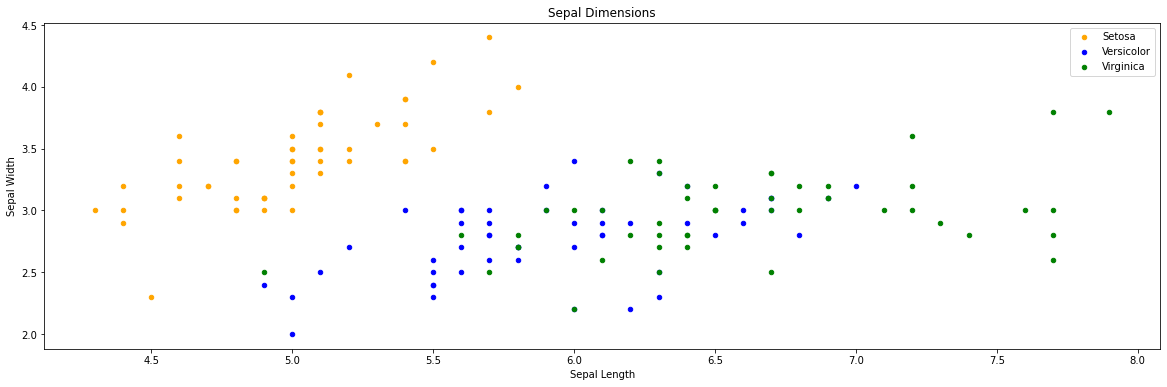

In [28]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Dimensions")
fig=plt.gcf()
fig.set_size_inches(20, 6)
plt.show()

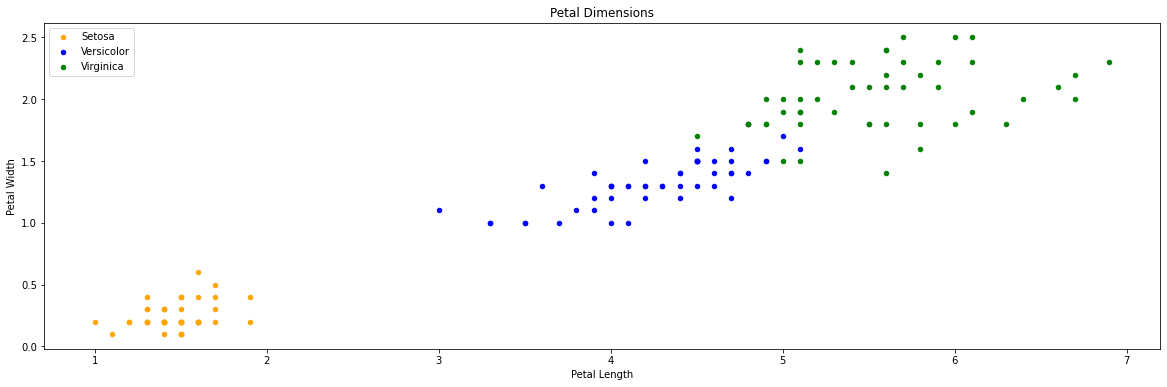

In [29]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='Versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Dimensions")
fig=plt.gcf()
fig.set_size_inches(20, 6)
plt.show()

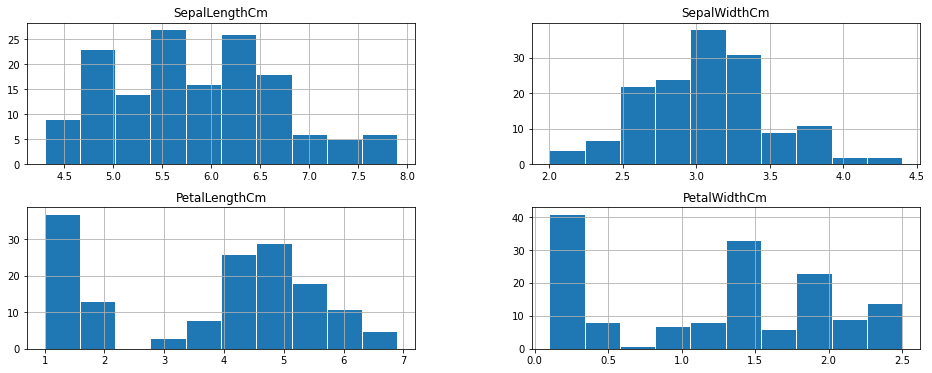

In [39]:
iris.hist(edgecolor='white')
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

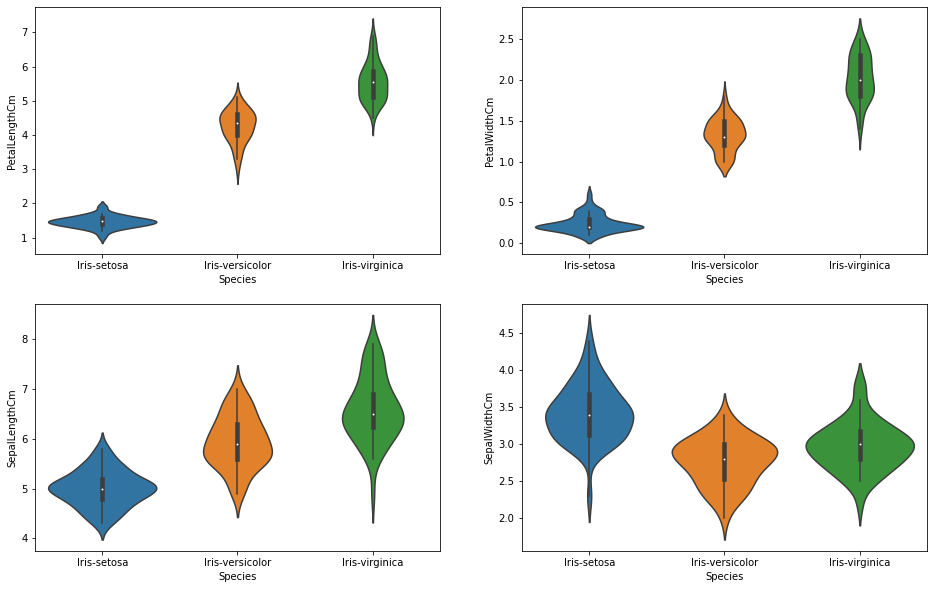

In [41]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [116]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.model_selection import train_test_split

# from sklearn.cross_validation import train_test_split #to split the dataset for training and testing; updated to model_selection

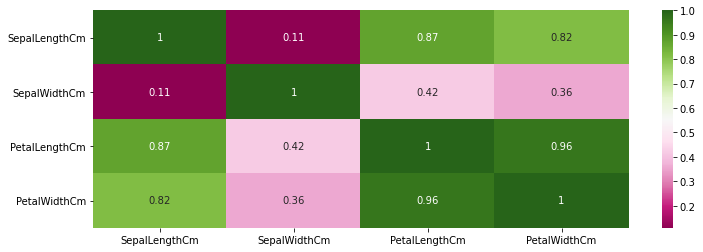

In [117]:
# Features selection: choose features which are not highly correlated to improve model accuracy
plt.figure(figsize=(12,4)) 
sns.heatmap(abs(iris.corr()),annot=True,cmap='PiYG') #draws heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [151]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.iloc[:,-1], test_size=0.3, random_state=133)

In [160]:
results = pd.DataFrame()

In [212]:
# SVC
model = svm.SVC() # set model

model.fit(X_train,y_train) # train model
y_prediction=model.predict(X_test) # predict classifications of test data
print('SVM Accuracy:', round(metrics.accuracy_score(y_prediction,y_test), 2))
a_1_acc = round(metrics.accuracy_score(y_prediction,y_test), 2)

SVM Accuracy: 0.98


In [213]:
# Logistic Regression
model = LogisticRegression(solver='lbfgs', max_iter=1000) #increased max_iter to increase likelihood of convergence

model.fit(X_train, y_train)
y_prediction=model.predict(X_test)
print('Logistic Regression Accuracy:', round(metrics.accuracy_score(y_prediction,y_test), 2))
a_2_acc = round(metrics.accuracy_score(y_prediction,y_test), 2)

Logistic Regression Accuracy: 0.98


In [214]:
# Decision Tree
model=DecisionTreeClassifier()

model.fit(X_train,y_train)
y_prediction=model.predict(X_test)
print('Decision Tree Accuracy:', round(metrics.accuracy_score(y_prediction,y_test), 2))
a_3_acc = round(metrics.accuracy_score(y_prediction,y_test), 2)

Decision Tree Accuracy: 0.93


In [215]:
# K-Nearest Neighbours
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class

model.fit(X_train,y_train)
y_prediction=model.predict(X_test)
print('kNN Accuracy:', round(metrics.accuracy_score(y_prediction,y_test), 2))
a_4_acc = round(metrics.accuracy_score(y_prediction,y_test), 2)

kNN Accuracy: 0.96


#### Creating Petals And Sepals Training Data

In [216]:
# Create subsets of data for just Petal and Sepal Lengths/Widths
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

# Petals
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species

# Sepals
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [217]:
# SVM
model=svm.SVC()

model.fit(train_x_p,train_y_p) 
y_prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(y_prediction,test_y_p))
p_1_acc = round(metrics.accuracy_score(y_prediction,test_y_p), 2)

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
y_prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(y_prediction,test_y_s))
s_1_acc = round(metrics.accuracy_score(y_prediction,test_y_s), 2)

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [218]:
# Logistic Regression
model = LogisticRegression()

model.fit(train_x_p,train_y_p) 
y_prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(y_prediction,test_y_p))
p_2_acc = round(metrics.accuracy_score(y_prediction,test_y_p), 2)

model.fit(train_x_s,train_y_s) 
y_prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(y_prediction,test_y_s))
s_2_acc = round(metrics.accuracy_score(y_prediction,test_y_s), 2)

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [219]:
# Decision Tree
model=DecisionTreeClassifier()

model.fit(train_x_p,train_y_p) 
y_prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(y_prediction,test_y_p))
p_3_acc = round(metrics.accuracy_score(y_prediction,test_y_p), 2)

model.fit(train_x_s,train_y_s) 
y_prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(y_prediction,test_y_s))
s_3_acc = round(metrics.accuracy_score(y_prediction,test_y_s), 2)

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


In [252]:
# K-Nearest Neighbours
model=KNeighborsClassifier(n_neighbors=3) 

model.fit(train_x_p,train_y_p) 
y_prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(y_prediction,test_y_p))
s_4_acc = round(metrics.accuracy_score(y_prediction,test_y_p), 2)

model.fit(train_x_s,train_y_s) 
y_prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(y_prediction,test_y_s))
p_4_acc = round(metrics.accuracy_score(y_prediction,test_y_s), 2)

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


In [253]:
results = pd.DataFrame()
results['type'] = ['All', 'Sepal', 'Petal']
results['SVC'] = [a_1_acc, s_1_acc, p_1_acc]
results['Logistic Regression'] = [a_2_acc, s_2_acc, p_2_acc]
results['Decision Tree'] = [a_3_acc, s_3_acc, p_3_acc]
results['kNN'] = [a_4_acc, s_4_acc, p_4_acc]
results.head()

,type,SVC,Logistic Regression,Decision Tree,kNN
0,All,0.98,0.98,0.93,0.96
1,Sepal,0.80,0.82,0.64,0.98
2,Petal,0.98,0.98,0.96,0.73


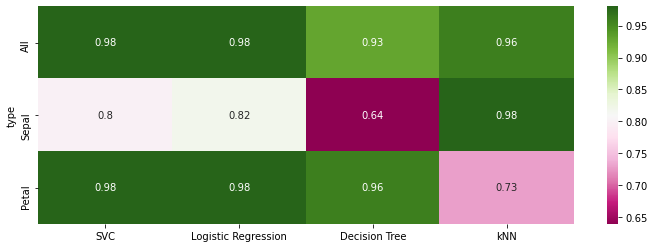

In [251]:
results_viz = results.set_index('type')
plt.figure(figsize=(12,4)) 
sns.heatmap(results_viz,annot=True,cmap='PiYG') 
plt.show()